# 시티랩스 3년 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from datetime import timedelta

In [82]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D

In [83]:
df1 = pd.read_csv('./data/시티랩스_전환가액의조정.csv',index_col=0)
df1

,번호,공시대상회사,보고서명,제출인,접수일자,비고
0,1,코 시티랩스,전환가액의조정 (제8회차),시티랩스,2021.09.29,코
1,2,코 시티랩스,전환가액의조정 (제9회차),시티랩스,2021.08.31,코
2,3,코 시티랩스,전환가액의조정 (제8회차),시티랩스,2021.06.29,코
3,4,코 시티랩스,전환가액의조정 (제7회차),시티랩스,2020.08.31,코
4,5,코 시티랩스,전환가액의조정 (제5회차),시티랩스,2020.08.25,코
5,6,코 시티랩스,전환가액의조정 (제4회차),시티랩스,2019.09.30,코
6,7,코 시티랩스,전환가액의조정,시티랩스,2019.07.01,코


In [84]:
df2 = pd.read_csv('./data/시티랩스_전환사채발행결정.csv',index_col=0)
df2

,번호,공시대상회사,보고서명,제출인,접수일자,비고
0,1,코 시티랩스,[기재정정]주요사항보고서(전환사채권발행결정),시티랩스,2021.12.30,NaN
1,2,코 시티랩스,[기재정정]주요사항보고서(전환사채권발행결정),시티랩스,2021.12.30,NaN
2,3,코 시티랩스,주요사항보고서(전환사채권발행결정),시티랩스,2020.05.26,NaN
3,4,코 시티랩스,[기재정정]주요사항보고서(전환사채권발행결정),시티랩스,2020.05.25,NaN
4,5,코 시티랩스,주요사항보고서(전환사채권발행결정),시티랩스,2020.03.31,NaN
5,6,코 시티랩스,[기재정정]주요사항보고서(전환사채권발행결정),시티랩스,2019.04.01,NaN
6,7,코 시티랩스,[첨부정정]주요사항보고서(전환사채권발행결정),시티랩스,2018.04.24,NaN
7,8,코 시티랩스,주요사항보고서(전환사채권발행결정),시티랩스,2017.11.14,NaN


In [85]:
df_ct = pd.read_csv('./data/시티랩스_모델데이터1.csv',index_col=0)
df_ct.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
1,2016-01-05,3020,0.00,-0.452066,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.913043,-0.176471,-0.200000,-3.000000,8.000000,-0.250000,-0.8
2,2016-01-06,2895,-4.14,0.292444,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,16.000000,-0.071429,1.250000,-2.750000,-0.388889,4.333333,-0.8
3,2016-01-07,2945,1.73,0.843234,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.088235,2.615385,0.155556,-1.761905,0.909091,-0.843750,-0.8
4,2016-01-08,2920,-0.85,-0.546023,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,-0.870968,-0.829787,-0.288462,-0.750000,0.571429,4.800000,-0.8
5,2016-01-11,2810,-3.77,-0.349444,-0.229885,0.666667,4.5,4.5,-0.022624,-0.283582,...,3.357143,0.00627,1.88,5.250000,-0.375000,-0.270270,-6.000000,-0.939394,-0.241379,-0.8


In [86]:
df_ct[df_ct['일자']=='2017-12-28']

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
488,2017-12-28,3390,10.24,0.163247,-0.015873,5.25,29.666667,29.333333,-0.065068,0.287234,...,26.071429,-0.230159,2.69,0.174757,7.65,0.321429,-1.626506,0.72973,-0.9,-0.360168


In [87]:
# 2018년부터
df_ct = df_ct.iloc[489:,:]
df_ct.head()

,일자,종가,등락률,거래대금,매출액(억원),영업이익(억원),당기순이익(억원),지배주주순이익(억원),자산총계(억원),부채총계(억원),...,EPS(원),BPS(원),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
490,2018-01-03,4695,6.58,1.813856,-0.483871,-0.68,-0.913043,-0.912088,0.595238,1.103306,...,-0.920844,-0.008723,3.12,554.000000,-0.971223,0.347518,-1.769784,-0.439716,92.000000,-0.360168
491,2018-01-04,4910,4.58,-0.465532,-0.483871,-0.68,-0.913043,-0.912088,0.595238,1.103306,...,-0.920844,-0.008723,3.12,-0.063063,35.750000,0.031579,-1.401869,0.164557,-0.736559,-0.360168
492,2018-01-05,4865,-0.92,-0.641683,-0.483871,-0.68,-0.913043,-0.912088,0.595238,1.103306,...,-0.920844,-0.008723,3.12,-0.836538,-0.755102,-0.673469,-0.558140,-0.489130,-0.428571,-0.360168
493,2018-01-08,5190,6.68,1.018093,-0.483871,-0.68,-0.913043,-0.912088,0.595238,1.103306,...,-0.920844,-0.008723,3.12,6.294118,4.138889,2.375000,2.210526,0.957447,0.107143,-0.360168
494,2018-01-09,5100,-1.73,-0.597300,-0.483871,-0.68,-0.913043,-0.912088,0.595238,1.103306,...,-0.920844,-0.008723,3.12,-0.467742,-0.664865,-0.546296,-1.065574,-0.652174,0.161290,-0.360168


In [88]:
 df_ct.columns

Index(['일자', '종가', '등락률', '거래대금', '매출액(억원)', '영업이익(억원)', '당기순이익(억원)',
       '지배주주순이익(억원)', '자산총계(억원)', '부채총계(억원)', '자본총계(억원)', '자본금(억원)', '부채비율(%)',
       '영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)', 'ROE(%)', 'EPS(원)', 'BPS(원)',
       'PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가',
       '전환사채전환총액'],
      dtype='object')

In [89]:
df_ct1 = df_ct[['등락률', '거래대금', '부채비율(%)','영업이익률(%)', '지배주주순이익률(%)', 'ROA(%)',
                'ROE(%)','PBR(배)', '고가-종가', '고가-시가', '고가-저가', '종가-시가', '종가-저가', '시가-저가','전환사채전환총액']]

In [90]:
df_ct1

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
490,6.58,1.813856,140.52,-12.65,-12.21,-4.42,-9.40,3.12,554.000000,-0.971223,0.347518,-1.769784,-0.439716,92.000000,-0.360168
491,4.58,-0.465532,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-0.063063,35.750000,0.031579,-1.401869,0.164557,-0.736559,-0.360168
492,-0.92,-0.641683,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-0.836538,-0.755102,-0.673469,-0.558140,-0.489130,-0.428571,-0.360168
493,6.68,1.018093,140.52,-12.65,-12.21,-4.42,-9.40,3.12,6.294118,4.138889,2.375000,2.210526,0.957447,0.107143,-0.360168
494,-1.73,-0.597300,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-0.467742,-0.664865,-0.546296,-1.065574,-0.652174,0.161290,-0.360168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,0.93,-0.676301,70.72,8.27,-5.78,5.11,28.95,1.65,-0.742424,-0.712644,-0.580645,-0.619048,-0.185185,1.333333,-0.910293
1471,-8.15,0.997646,70.72,8.27,-5.78,5.11,28.95,1.65,0.058824,-0.960000,-0.025641,-3.250000,-0.090909,1.714286,-0.910293
1472,0.13,-0.792877,70.72,8.27,-5.78,5.11,28.95,1.65,-0.500000,9.000000,-0.473684,-1.055556,-0.450000,-0.736842,-0.910293
1473,4.87,1.293926,70.72,8.27,-5.78,5.11,28.95,1.65,-0.111111,4.400000,1.700000,45.000000,3.181818,-0.900000,-0.910293


In [44]:
for i in range(len(df_ct1.columns)):
    
    if np.inf in df_ct1.iloc[:,i].unique():
        print(i)  
        
    else:
        print('없음')

없음
1
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음
없음


In [91]:
df_ct1[df_ct1.거래대금 == np.inf]

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
501,-2.35,inf,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-1.239216,359.0,1339.0,-1.168627,-0.976471,979.0,-0.360168
1100,-8.92,inf,93.59,6.01,-4.47,0.50,-25.01,1.52,-1.069231,22.0,45.0,-1.033846,-0.998462,22.0,-0.540676


In [92]:
df_ct2 = df_ct1[df_ct1.거래대금 != np.inf]
df_ct2

,등락률,거래대금,부채비율(%),영업이익률(%),지배주주순이익률(%),ROA(%),ROE(%),PBR(배),고가-종가,고가-시가,고가-저가,종가-시가,종가-저가,시가-저가,전환사채전환총액
490,6.58,1.813856,140.52,-12.65,-12.21,-4.42,-9.40,3.12,554.000000,-0.971223,0.347518,-1.769784,-0.439716,92.000000,-0.360168
491,4.58,-0.465532,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-0.063063,35.750000,0.031579,-1.401869,0.164557,-0.736559,-0.360168
492,-0.92,-0.641683,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-0.836538,-0.755102,-0.673469,-0.558140,-0.489130,-0.428571,-0.360168
493,6.68,1.018093,140.52,-12.65,-12.21,-4.42,-9.40,3.12,6.294118,4.138889,2.375000,2.210526,0.957447,0.107143,-0.360168
494,-1.73,-0.597300,140.52,-12.65,-12.21,-4.42,-9.40,3.12,-0.467742,-0.664865,-0.546296,-1.065574,-0.652174,0.161290,-0.360168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,0.93,-0.676301,70.72,8.27,-5.78,5.11,28.95,1.65,-0.742424,-0.712644,-0.580645,-0.619048,-0.185185,1.333333,-0.910293
1471,-8.15,0.997646,70.72,8.27,-5.78,5.11,28.95,1.65,0.058824,-0.960000,-0.025641,-3.250000,-0.090909,1.714286,-0.910293
1472,0.13,-0.792877,70.72,8.27,-5.78,5.11,28.95,1.65,-0.500000,9.000000,-0.473684,-1.055556,-0.450000,-0.736842,-0.910293
1473,4.87,1.293926,70.72,8.27,-5.78,5.11,28.95,1.65,-0.111111,4.400000,1.700000,45.000000,3.181818,-0.900000,-0.910293


In [93]:
df_ct2.shape

(983, 15)

In [ ]:
df_ct2

## 30일 10일

In [94]:
window_size = 30
target_period = 10

X = []
Y = []


for i in range(len(df_ct2) - window_size-target_period): 
    
    # 피쳐값 
    X.append([df_ct2.iloc[i+j,1:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct2.iloc[window_size+i+j,0] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 7:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [95]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [96]:
train_test_split = 700

x_train = X_ary[:700]
y_train = Y1_ary[:700]

x_test = X_ary[700:]
y_test = Y1_ary[700:]

In [97]:
x_train.shape

(700, 30, 14)

In [98]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(30,14)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               46000     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 46,101
Trainable params: 46,101
Non-trainable params: 0
_________________________________________________________________


In [99]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [100]:
model.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [101]:
hist = model.fit(x_train, y_train, epochs=50, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/50
70/70 [==============================] - 2s 10ms/step - loss: 0.6374 - accuracy: 0.6486 - val_loss: 0.5218 - val_accuracy: 0.8272
Epoch 2/50
70/70 [==============================] - 0s 6ms/step - loss: 0.6202 - accuracy: 0.6571 - val_loss: 0.5064 - val_accuracy: 0.8272
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.6643 - val_loss: 0.5039 - val_accuracy: 0.8272
Epoch 4/50
70/70 [==============================] - 0s 6ms/step - loss: 0.5934 - accuracy: 0.6729 - val_loss: 0.4970 - val_accuracy: 0.8272
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 0.5813 - accuracy: 0.6771 - val_loss: 0.4932 - val_accuracy: 0.8272
Epoch 6/50
70/70 [==============================] - 0s 6ms/step - loss: 0.5686 - accuracy: 0.6786 - val_loss: 0.4833 - val_accuracy: 0.8272
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.5557 - accuracy: 0.6886 - val_loss: 0.4832 - val_accuracy: 0.8272
Epoch 8/50
70/70 [=

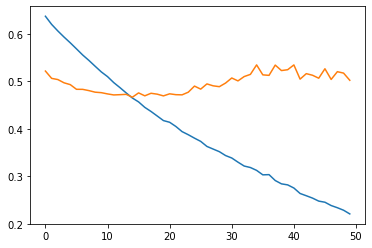

In [102]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

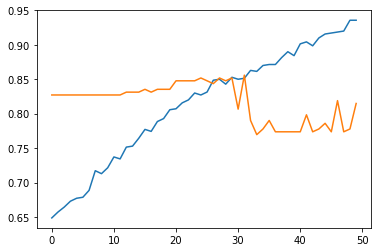

In [103]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [104]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.5023 - accuracy: 0.8148


[0.502335250377655, 0.8148148059844971]

In [22]:
pred = model.predict(x_test)
len(pred)

340

In [23]:
pred

array([[3.84225947e-04],
       [1.09614521e-04],
       [1.16252428e-04],
       [3.47803556e-03],
       [8.07909202e-03],
       [7.63557712e-03],
       [1.88666843e-02],
       [1.87168666e-03],
       [4.34510177e-04],
       [1.19438220e-04],
       [4.13860434e-05],
       [2.81013490e-05],
       [3.02313492e-05],
       [8.72145174e-05],
       [4.95317800e-05],
       [5.05676471e-05],
       [4.50252264e-05],
       [5.71652963e-05],
       [1.80976829e-04],
       [4.59768297e-03],
       [1.13763206e-03],
       [1.10148778e-03],
       [8.95405747e-03],
       [6.98244050e-02],
       [2.73335934e-01],
       [9.98107314e-01],
       [9.99278009e-01],
       [9.99485731e-01],
       [9.99578297e-01],
       [9.99462664e-01],
       [9.99584973e-01],
       [9.99713004e-01],
       [9.99753654e-01],
       [9.97108519e-01],
       [1.65593368e-03],
       [1.83848839e-03],
       [1.51322616e-04],
       [8.09156190e-05],
       [4.60072006e-05],
       [2.09340680e-04],


In [24]:
ans = []
for i in pred:
    ans.append(round(i[0]))

In [88]:
Counter(ans)

Counter({0: 260})

In [79]:
len(y_test)

260

In [81]:
from collections import Counter
Counter(y_test)


Counter({0.0: 241, 1.0: 19})

## 10일 10일

In [106]:
window_size = 10
target_period = 10

X = []
Y = []


for i in range(len(df_ct2) - window_size): 
    
    # 피쳐값 
    X.append([df_ct2.iloc[i+j,1:] for j in range(window_size)]) # j= 0부터 29 -> 30일치 데이터

    # 등락률 
    Y.append([df_ct2.iloc[i+j,0] for j in range(target_period)])
    
Y1 = []
for y in Y:
    toggle = 0
    for i in y:

        if i >= 7:
            Y1.append(1)
            toggle = 1
            break
    if toggle != 1:
        Y1.append(0)


In [107]:
X_ary = np.array(X).astype(float)
Y1_ary = np.array(Y1).astype(float)

In [108]:
train_test_split = 700

x_train = X_ary[:700]
y_train = Y1_ary[:700]

x_test = X_ary[700:]
y_test = Y1_ary[700:]

In [109]:
x_train.shape

(700, 10, 14)

In [110]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(LSTM(100, input_shape=(10,14)))
    model.add(Dense(1,activation='sigmoid'))
    model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               46000     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 46,101
Trainable params: 46,101
Non-trainable params: 0
_________________________________________________________________


In [111]:
# learning rate 설정
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [112]:
model.compile(loss='binary_crossentropy', metrics ='accuracy', optimizer=Adam)

In [113]:
hist = model.fit(x_train, y_train, epochs=100, batch_size= 10, validation_data= (x_test,y_test))

Epoch 1/100
70/70 [==============================] - 1s 10ms/step - loss: 0.7229 - accuracy: 0.5000 - val_loss: 0.6127 - val_accuracy: 0.7875
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6584 - accuracy: 0.6543 - val_loss: 0.5936 - val_accuracy: 0.8022
Epoch 3/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6285 - accuracy: 0.6771 - val_loss: 0.5794 - val_accuracy: 0.8059
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.6073 - accuracy: 0.7071 - val_loss: 0.5757 - val_accuracy: 0.7802
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.7071 - val_loss: 0.5759 - val_accuracy: 0.7656
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5750 - accuracy: 0.7057 - val_loss: 0.5730 - val_accuracy: 0.7656
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.5599 - accuracy: 0.7200 - val_loss: 0.5747 - val_accuracy: 0.7656
Epoch 8/100


Epoch 59/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1223 - accuracy: 0.9714 - val_loss: 0.4795 - val_accuracy: 0.7875
Epoch 60/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1190 - accuracy: 0.9671 - val_loss: 0.4984 - val_accuracy: 0.7875
Epoch 61/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1146 - accuracy: 0.9729 - val_loss: 0.4856 - val_accuracy: 0.7875
Epoch 62/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1097 - accuracy: 0.9743 - val_loss: 0.4931 - val_accuracy: 0.7912
Epoch 63/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1064 - accuracy: 0.9786 - val_loss: 0.4920 - val_accuracy: 0.7912
Epoch 64/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1069 - accuracy: 0.9743 - val_loss: 0.5079 - val_accuracy: 0.7802
Epoch 65/100
70/70 [==============================] - 0s 5ms/step - loss: 0.1012 - accuracy: 0.9771 - val_loss: 0.4849 - val_accuracy: 0.7912
Epoch 

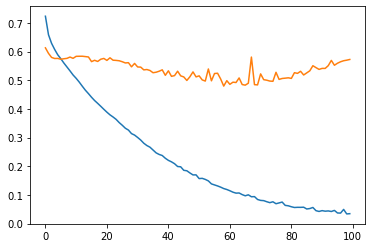

In [114]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

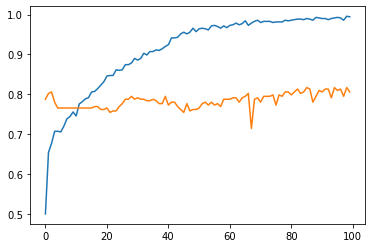

In [115]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [116]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.5723 - accuracy: 0.8059


[0.5722894072532654, 0.8058608174324036]